# Data management

## Machine Learning - Classifications

## [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()

In [1]:
import numpy as np
import pandas as pd
# import patsy

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: toy example using a logistic regression

### Load & visualise data

In [2]:
df=pd.read_csv("../data/beers.csv")
df.shape

(225, 5)

In [3]:
df.head()

,alcohol_content,bitterness,darkness,fruitiness,is_yummy
0,3.739295,0.422503,0.989463,0.215791,0
1,4.207849,0.841668,0.928626,0.380420,0
2,4.709494,0.322037,5.374682,0.145231,1
3,4.684743,0.434315,4.072805,0.191321,1
4,4.148710,0.570586,1.461568,0.260218,0


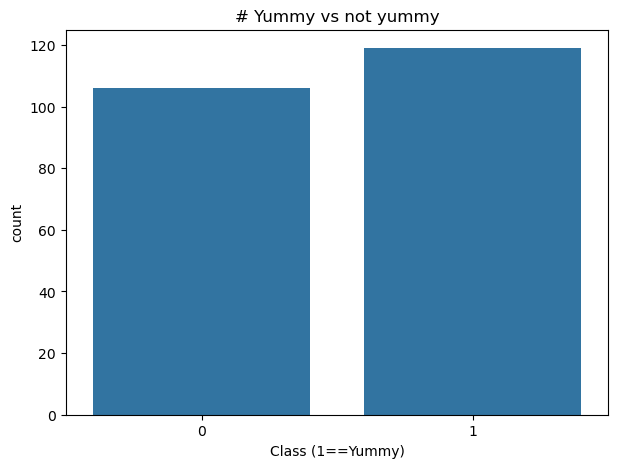

In [4]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='is_yummy', data=df)
_ = plt.title('# Yummy vs not yummy')
_ = plt.xlabel('Class (1==Yummy)')

#### Prepare data: split features and labels

In [5]:
# all columns up to the last one:
X = df.iloc[:, :-1]
# only the last column:
y = df.iloc[:, -1]

### Splitting into Training and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Model Building and Training 

#### Creating the pipeline

Before we build the model, 
1. we use the standard scaler function to scale the values into a common range. 
2. Next, we create an instance of LogisticRegression() function for logistic regression.

We are not passing any parameters to `LogisticRegression()` so it will assume default parameters. Some of the important parameters you should know are –

- **penalty**:  It specifies the norm for the penalty
  - Default = L2 

- **C**:  It is the inverse of regularization strength
  - Default = 1.0 

- **solver**: It denotes the optimizer algorithm
  - Default = ‘lbfgs’

We are making use of `Pipeline` to create the model to streamline standard scalar and model building.

In [7]:
scaler = StandardScaler()

lr = LogisticRegression(max_iter=10000, solver='lbfgs') #syntax if you wand to add hyperparameters

model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model1

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])

#### Fit our model to the training data

In [8]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [9]:
model1.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=10000))])>

#### Predictions for the class and for the probabilities

In [10]:
y_train_hat = model1.predict(X_train) # predicting on the training set
y_train_hat[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [11]:
y_train_hat_probs = model1.predict_proba(X_train)[:,1] # probabilities of being in class 1

We can see that the model predicts $y_i=1$ when $p_i>0.5$:

In [12]:
temp= pd.DataFrame({'y_train_hat': y_train_hat, 'y_train_hat_probs': y_train_hat_probs})
temp.head(10)

,y_train_hat,y_train_hat_probs
0,0,0.063636
1,0,0.414138
2,0,0.000031
3,1,0.643636
4,1,0.955426
5,0,0.000047
6,1,0.962593
7,0,0.077018
8,0,0.003881
9,0,0.001481


<Axes: >

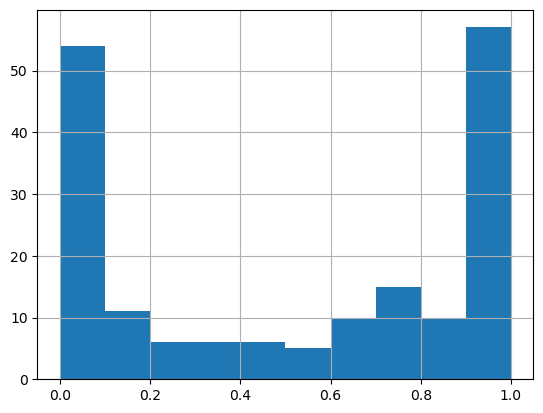

In [13]:
temp['y_train_hat_probs'].hist()

#### Performance on the training set

In [14]:
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[78  8]
 [ 5 89]]
Training AUC: 98.1321 %
Training accuracy: 92.7778 %


### Test set

<div class="alert alert-info">
<h4> Your turn</h4>
Following the computation on the train set, compute for the test set:
     
    - the class & proba predictions
    - the accuracy and AUC
</div>

In [15]:
# Predictions on the test set
y_test_hat = model1.predict(X_test)
# Probabilities of being in class 1
y_test_hat_probs = model1.predict_proba(X_test)[:,1]

# Metrics
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc)
print('Testing accuracy: %.4f %%' % test_accuracy) 


Confusion matrix:
 [[20  0]
 [ 4 21]]
Testing AUC: 96.6000 %
Testing accuracy: 91.1111 %


In [16]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.833333  1.000000  0.909091        20
           1   1.000000  0.840000  0.913043        25

    accuracy                       0.911111        45
   macro avg   0.916667  0.920000  0.911067        45
weighted avg   0.925926  0.911111  0.911287        45



### Plot the ROC curve

In [17]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_hat_probs)
print("tresholds:",  len(threshold))
roc_auc = metrics.auc(fpr, tpr)
roc_auc

tresholds: 8


np.float64(0.966)

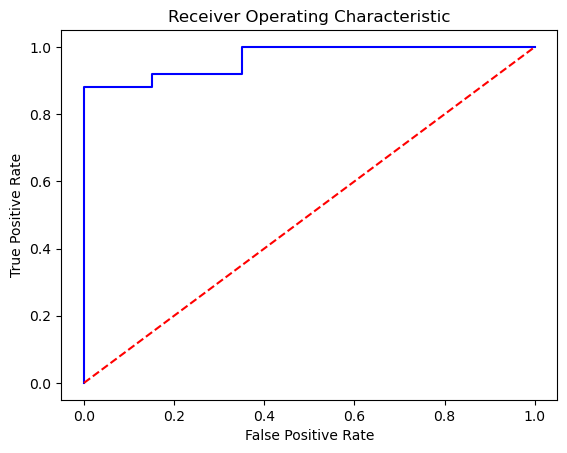

In [18]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can further try to improve this model performance by hyperparameter tuning by changing the value of C or choosing other solvers available in `LogisticRegression()`.

## Part 2

The objective is to build a classifier for whether a firm is going to default. 

### Load & visualise data

In [19]:
data = pd.read_csv("../data/bisnode_firms_clean.csv")

In [20]:
#pip install summarytools

In [21]:
from summarytools import dfSummary
dfSummary(data, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,year[int64],1. 2012,"19,036 (100.0%)",,0(0.0%)
2,comp_id[float64],Mean (sd) : 152927506242.8 (137731873303.4)min < med < max:1001541.0 < 114268774400.0 < 464105013248.0IQR (CV) : 226922635264.0 (1.1),"19,036 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACgUlEQVR4nO3dP2/aQByH8d9BQCZQI0QLG0v3Dh5Z+g76Yrt2D2+AoUsnFoSEwAg3COTSpVStGvHnrg7+Ws9nzl0YnhzHGeXc8Xg0oOxq934BwDUeLv2Ac65lZk3P+ffH4/HZcyzw29lQnXOtfr//KY7jns/km81m5Zz7TKwIdWlFbcZx3BuPx8/dbnd3y8RpmkZPT0+95XLZNDNCRZCLb/1mZt1udzcYDL57zN/yGAP8gw9TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokHDV//D3led5w8xi55zvFFz/AzMrMNQsyxqHw+HDaDSq1+v1m25UOeH6H5wUFup+v3+IougxSZLdcDhc3Tqe63/wp0Lf+s3M2u2279U/Zlz/g1/4MAUJhAoJhAoJhe9RQwQeb3G0VSGlDTX0eIujrWopbaghx1scbVVPaUM98T3eyvM8Np6KVUbpQ/XBU7HqqWSoPBWrnkqGehLyVCxw68C24T+rdKi+QrcO6/V665z7YmY+2w4ifwGhviBk6zCfz99MJpOPo9Ho7R0iN6to6IR6hs/WYbVate4VuVl1V3NCLchrR25WitW8ZmY/PMee/SMh1BLy/RB4z9U8z/NGlmXvO53Ot1qtdrh1/KXjQEKtoHus5rPZrDedTt8lSfK1iCeJhIq/hKzmIePtwpfk+ZofJBAqJBAqJBAqJBAqJBAqJBAqJFx1jpqmaXTrxNvtNjIzy7IsWiwWj685XvV3q77u0PHX9PUTxXaSRjQ7klAAAAAASUVORK5CYII="">",0(0.0%)
3,begin[object],1. 2012-01-012. 2012-12-013. 2012-02-294. 2012-02-275. 2012-02-286. 2012-10-017. 2012-04-018. 2012-02-229. 2012-03-0110. 2012-02-2411. other,"18,115 (95.2%)40 (0.2%)29 (0.2%)27 (0.1%)24 (0.1%)21 (0.1%)17 (0.1%)14 (0.1%)13 (0.1%)12 (0.1%)724 (3.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD2UlEQVR4nO3cQWojVxhG0b+McNoTCSHwEpI9eBG92F6EFpE9GKMatB1PlEHTEBx3koFzRZRzZlZN3uDCo6A+L+fzeaBwc+kD8P8hNjJiIyM2MmIjIzYyYiMjNjJiI7PMzN3M3F76IFyN1/P5/Pzeg83hcPi83W739Ym4Tuu6Pi3L8uW94Dbb7Xb/8PDwvNvtXi5xOK7H6XT6dDwe94+Pj7cz8+fYZmZ2u93L/f391/x0XKO7Hz3wgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQ2M9++Q7r0Qfjv+7uONuu6Ph2Px/38xXdI8E+t6/o0M6/vPbNB4KP9cIOw+JdZVLwgkLlZluWXZVm8IPCvu5mZn2fmp0sfhOvnGiUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3MzM7/OzG+XPgjXzwaBjGuUjNjIGLyQMXgh4xolIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa5SM2MiIjYx1FRnrKjKuUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryLhGyYiNjMELGYMXMq5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuEbJiI2MwQsZgxcyrlEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxrlIzYyFhXkbGuIuMaJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGuUjNjIGLyQMXgh4xolIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa5SM2MiIjYx1FRnrKjKuUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryLhGyYiNjMELGYMXMq5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuEbJLDNzNzO37zx7PZ/Pz/F5uGKbw+Hwebvd7t8+WNf1aVmWL4Ljo2y22+3+4eHhebfbvXz/8XQ6fToej/vHx8fbmREbH2IzM7Pb7V7u7++/vnl2d4HzcMW8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzHz7pOiPP779Gz7CZl3Xp+PxuJ83nxSt6/o0M6+XORbXyGfhZKyryHhBICM2MmIjIzYyYiMjNjJiIyM2MmIj8zsMKJ40AD7AsgAAAABJRU5ErkJggg=="">",0(0.0%)
4,end[object],1. 2012-12-312. 2012-09-303. 2012-11-214. 2012-10-315. 2012-09-016. 2012-02-297. 2012-05-318. 2012-08-319. 2012-10-0910. 2012-10-2411. other,"18,949 (99.5%)3 (0.0%)3 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)67 (0.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADcElEQVR4nO3csW0jZxRG0TcEsbaSIYgBVILdg4rY1H1uESrCTQiawLtWQge2S9AdYPacSOEfXOCRAD8tj8djoHA5+gH8PMRGRmxkxEZGbGTERkZsZMRGRmxklpl5mpkvRz+E0/u4btv2dV3X+9Ev4dz2fX+7rut6f3l5+X673X4c/SDO6f39/dfX19f7dWbmdrv9eH5+/uvoR3FqT74gkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmevMv783OvohnNf/fS3btv3hl7p8tn3f32wQqHws/mUWFV8QyFyWZfl9WRZfEPh0l5n5

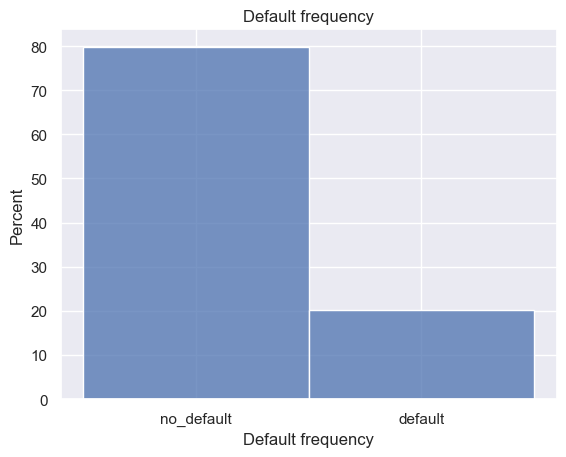

In [22]:
sns.set_theme()
sns.histplot(data=data, x="default_f", stat="percent") 
plt.title('Default frequency')
plt.xlabel('Default frequency') 
plt.show()

In [23]:
y=data['default']
X=data.drop(columns='default')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

All sets are balanced:

In [25]:
print("--- Total ---")
print(y.value_counts(normalize=True))
print("--- Train ---")
print(y_train.value_counts(normalize=True))
print("--- Test ---")
print(y_test.value_counts(normalize=True))

--- Total ---
default
0    0.797857
1    0.202143
Name: proportion, dtype: float64
--- Train ---
default
0    0.799958
1    0.200042
Name: proportion, dtype: float64
--- Test ---
default
0    0.791553
1    0.208447
Name: proportion, dtype: float64


### Model building

There are so many variables !

We are going to compare several models : 
- Logit with a selection of variables **M1**
- Logit with a selection of variables **M2**
- Regularized logit on **M2** variables

Firm related variables

In [26]:
firm = ["age", "age2", "new", "ind2_cat", "m_region_loc", "urban_m"]

Human capital related variables

In [27]:
hr = [
    "female",
    "ceo_age",
    "flag_high_ceo_age",
    "flag_low_ceo_age",
    "flag_miss_ceo_age",
    "ceo_count",
    "labor_avg_mod",
    "flag_miss_labor_avg",
    "foreign_management",
]

Financial variables

In [28]:
qualityvars = ["balsheet_flag", "balsheet_length", "balsheet_notfullyear"]

engvar = [
    "total_assets_bs",
    "fixed_assets_bs",
    "liq_assets_bs",
    "curr_assets_bs",
    "share_eq_bs",
    "subscribed_cap_bs",
    "intang_assets_bs",
    "extra_exp_pl",
    "extra_inc_pl",
    "extra_profit_loss_pl",
    "inc_bef_tax_pl",
    "inventories_pl",
    "material_exp_pl",
    "profit_loss_year_pl",
    "personnel_exp_pl",
]

Growth variables

In [29]:
d1 = [ 
    "d1_sales_mil_log_mod",
    "d1_sales_mil_log_mod_sq",
    "flag_low_d1_sales_mil_log",
    "flag_high_d1_sales_mil_log",
]

In [30]:
M1 = [
    "sales_mil_log",
    "sales_mil_log_sq",
    "d1_sales_mil_log_mod",
    "profit_loss_year_pl",
    "fixed_assets_bs",
    "share_eq_bs",
    "age",
    "foreign_management",
    "ind2_cat",
]
M2 = ["sales_mil_log", "sales_mil_log_sq"] + firm + engvar + d1 + hr

#### Selection of the relevant variables

In [31]:
# M1
X_train_M1=X_train[M1]
X_test_M1 =X_test[M1]

In [32]:
# M2
X_train_M2=X_train[M2]
X_test_M2 =X_test[M2]

#### Set up the method for model selection

In [33]:
k = KFold(n_splits=5, shuffle=True, random_state=42)

#### No regularisation needed so setting the paremeter to very high value

In [34]:
C_value_logit = [1e20]

#### Where we put the results of the different models, for comparison purposes:

In [35]:
test_accuracy={}
test_auc_roc={}

### Model 1: Logit
#### Set up Logit model object

In [36]:
logistic = LogisticRegressionCV(
    Cs=C_value_logit,   #  # Cs: inverse of regularization strength.
    cv=k,               # 5-fold cross-validation
    refit=True,         # Refit the best estimator with the entire dataset
    solver="newton-cg", # Optimization algorithm
    tol=1e-7,           # Tolerance for stopping criteria
    random_state=42,    # Random seed
)

#### Creating the pipeline

In [37]:
pipeline_logit = Pipeline([
    ('standardize', StandardScaler()),
    ('log_reg', logistic)
                          ])
pipeline_logit

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

#### On M1 features set

In [38]:
pipeline_logit.fit(X_train_M1, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

In [39]:
# Predictions on the test set
y_test_hat = pipeline_logit.predict(X_test_M1)
y_test_hat_probs = pipeline_logit.predict_proba(X_test_M1)[:,1]

# Metrics
test_accuracy['logit_m1'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logit_m1'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m1'])
print('Testing accuracy: %.4f %%' % test_accuracy['logit_m1']) 


Confusion matrix:
 [[3615  152]
 [ 786  206]]
Testing AUC: 76.5941 %
Testing accuracy: 80.2900 %


#### On M2 features set

We need to deal with all the features: depending on their type, the pre-processing will be different

##### Categorical features

In [40]:
from sklearn.compose import make_column_selector as selector 

categorical_columns_selector = selector(dtype_include=object)  # Selects all columns of type object
categorical_features = categorical_columns_selector(X_train_M2) # Apply the selector to the training set
categorical_features

['m_region_loc']

In [41]:
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
categorical_transformer

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

##### Numeric features

In [42]:
numeric_features = [col for col in X_train_M2.columns if col not in categorical_features] # Select the columns that are not categorical
len(numeric_features)

35

In [43]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [44]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['sales_mil_log', 'sales_mil_log_sq', 'age',
                                  'age2', 'new', 'ind2_cat', 'urban_m',
                                  'total_assets_bs', 'fixed_assets_bs',
                                  'liq_assets_bs', 'curr_assets_bs',
                                  'share_eq_bs', 'subscribed_cap_bs',
                                  'intang_assets_bs', 'extra_exp_pl',
                                  'extra_inc_pl', 'extra_profit_loss_pl',
                                  'inc_bef_tax_pl', 'inventories_pl',
                                  'material_exp_pl', 'profit_loss_year_pl',
                                  'personnel_exp_pl', 'd1_sales_mil_log_mod',
                                  'd1_sales_mil_log_mod_sq',
                                  'flag_low_d1_sales_mil_log',
                                  'flag_high_d1_sales_mil_log', 'female',
                                  'ceo_age', 'flag_high_ceo_age',
                                  'flag_low_ceo_age', ...]),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['m_region_loc'])])

##### The pipeline:

In [45]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logit = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic)]
)
pipeline_logit

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                                   'flag_low_d1_sales_mil_log',
                                                   'flag_high_d1_sales_mil_log',
                                                   'female', 'ceo_age',
                                                   'flag_high_ceo_age',
                                                   'flag_low_ceo_age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['m_region_loc'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

<div class="alert alert-info">
<h4> Your turn: Fit the pipeline </h4>
Following M1 example, estimate and evaluate a logit model with cross-validation using the M2 set of features.     
</div>

In [46]:
pipeline_logit.fit(X_train_M2, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                                   'flag_low_d1_sales_mil_log',
                                                   'flag_high_d1_sales_mil_log',
                                                   'female', 'ceo_age',
                                                   'flag_high_ceo_age',
                                                   'flag_low_ceo_age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['m_region_loc'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

##### Performances for M2

In [47]:
y_test_hat = pipeline_logit.predict(X_test_M2) # predicting on the test set
y_test_hat_probs = pipeline_logit.predict_proba(X_test_M2)[:,1] # probabilities of being in class 1

test_accuracy['logit_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logit_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logit_m2']) 

Confusion matrix:
 [[3606  161]
 [ 745  247]]
Testing AUC: 77.8797 %
Testing accuracy: 80.9624 %


#### Comparing performance for the 2 logit models: 

In [48]:
test_auc_roc

{'logit_m1': np.float64(76.59411742038243),
 'logit_m2': np.float64(77.87974087363095)}

In [49]:
test_accuracy

{'logit_m1': 80.28997688590039, 'logit_m2': 80.96238705610422}

### Model 2: Lasso with standardized X data

In [50]:
lambdas = list(10 ** np.arange(-1, -4.01, -1 / 3)) # 10^-1, 10^-0.67, 10^-0.33, 10^0, 10^0.33, 10^0.67, 10^1
n_obs = X_train_M2.shape[0] * 4 / 5 # 4/5 of the training set
C_values = [
    1 / (l * n_obs) for l in lambdas
]  # Cs are the inverse of regularization strength
len(C_values)

10

In [51]:
logistic_lasso = LogisticRegressionCV(
    Cs=C_values,
    penalty="l1", # L1 regularization = lasso 
    cv=k,
    refit=True,
    scoring="roc_auc",
    solver="liblinear",
    random_state=42,
)


<div class="alert alert-info">
<h4> Your turn: Create and implement the pipeline with the logistic lasso </h4>
</div>

In [52]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logistic_lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic_lasso)]
)
pipeline_logistic_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                          np.float64(0.004063869189616846),
                                          np.float64(0.00875534075786229),
                                          np.float64(0.018862809851788558),
                                          np.float64(0.04063869189616842),
                                          np.float64(0.08755340757862287),
                                          np.float64(0.1886280985178856),
                                          np.float64(0.4063869189616842),
                                          np.float64(0.8755340757862277)],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      penalty='l1', random_state=42,
                                      scoring='roc_auc', solver='liblinear'))])

In [53]:
logLasso=pipeline_logistic_lasso.fit(X_train_M2, y_train)
logLasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                          np.float64(0.004063869189616846),
                                          np.float64(0.00875534075786229),
                                          np.float64(0.018862809851788558),
                                          np.float64(0.04063869189616842),
                                          np.float64(0.08755340757862287),
                                          np.float64(0.1886280985178856),
                                          np.float64(0.4063869189616842),
                                          np.float64(0.8755340757862277)],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      penalty='l1', random_state=42,
                                      scoring='roc_auc', solver='liblinear'))])

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# k = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_logistic_lasso, X_train_M2, y_train, cv = k)

In [56]:
y_test_hat = pipeline_logistic_lasso.predict(X_test_M2)
y_test_hat_probs = pipeline_logistic_lasso.predict_proba(X_test_M2)[:,1]

In [57]:
test_accuracy['logistic_lasso'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logistic_lasso'] = roc_auc_score(y_test, y_test_hat_probs)*100

In [58]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_hat_probs)
roc_auc = metrics.auc(fpr, tpr)
threshold

array([       inf, 0.92899416, 0.86952718, ..., 0.01826181, 0.01825688,
       0.01127071])

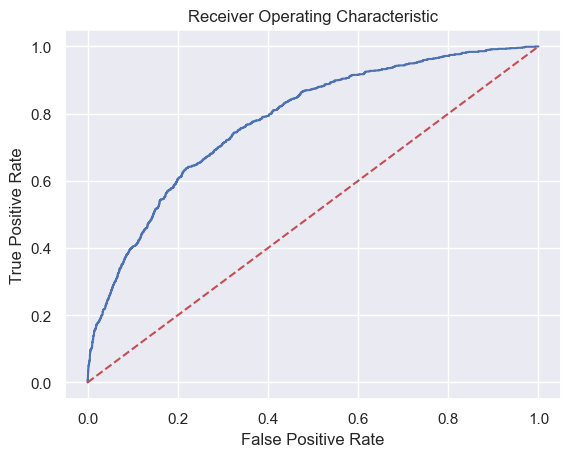

In [59]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparing the models

In [60]:
test_auc_roc

{'logit_m1': np.float64(76.59411742038243),
 'logit_m2': np.float64(77.87974087363095),
 'logistic_lasso': np.float64(77.82742427875353)}

In [61]:
test_accuracy

{'logit_m1': 80.28997688590039,
 'logit_m2': 80.96238705610422,
 'logistic_lasso': 80.75225887791552}

#### Deciding on the model

`logit_m2` seems to perform marginaly better on the test set. 

### Re-estimating the model on the full dataset

In [62]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logit = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic)]
)
pipeline_logit

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                                   'flag_low_d1_sales_mil_log',
                                                   'flag_high_d1_sales_mil_log',
                                                   'female', 'ceo_age',
                                                   'flag_high_ceo_age',
                                                   'flag_low_ceo_age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['m_region_loc'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

In [63]:
X_M2 = X[M2]

In [64]:
logLasso=pipeline_logit.fit(X_M2, y)
logLasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                                                   'flag_low_d1_sales_mil_log',
                                                   'flag_high_d1_sales_mil_log',
                                                   'female', 'ceo_age',
                                                   'flag_high_ceo_age',
                                                   'flag_low_ceo_age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['m_region_loc'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=[1e+20],
                                      cv=KFold(n_splits=5, random_state=42, shuffle=True),
                                      random_state=42, solver='newton-cg',
                                      tol=1e-07))])

### Using the model 

In [65]:
#y_new_hat = logLasso.predict(X_new)

## Going further

In [66]:
# pip install xgboost

Let's look at one of the most powerful machine learning model: `xgboost` (cf. [documentation](https://xgboost.readthedocs.io/en/latest/index.html))

In [67]:
import xgboost as xgb

In [68]:
xgb_model = xgb.XGBClassifier(objective="reg:squarederror", random_state=42)

In [69]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_xgp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb_model)]
)
pipeline_xgp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='reg:squarederror', ...))])

In [70]:
model_xgb=pipeline_xgp.fit(X_train_M2, y_train)
model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_mil_log',
                                                   'sales_mil_log_sq', 'age',
                                                   'age2', 'new', 'ind2_cat',
                                                   'urban_m', 'total_assets_bs',
                                                   'fixed_assets_bs',
                                                   'liq_assets_bs',
                                                   'curr_assets_bs',
                                                   'share_eq_bs',
                                                   'subscribed_cap_bs',
                                                   'intang_assets_bs',
                                                   'extra_exp_pl',
                                                   'extra_inc_pl',
                                                   'extr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='reg:squarederror', ...))])

In [71]:
y_test_hat = model_xgb.predict(X_test_M2)
y_test_hat_probs = model_xgb.predict_proba(X_test_M2)[:,1]

In [72]:
test_accuracy['xgb'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['xgb'] = roc_auc_score(y_test, y_test_hat_probs)*100

In [73]:
test_accuracy

{'logit_m1': 80.28997688590039,
 'logit_m2': 80.96238705610422,
 'logistic_lasso': 80.75225887791552,
 'xgb': 80.98339987392309}